# 01. Introduction


Name      : Ediashta Narendra Amarussalam <br>
Batch     : RMT036 <br>
Dataset   : [telecom_churn.csv]('https://www.kaggle.com/datasets/suraj520/telecom-churn-dataset')


### Objective

The telecommunication industry is one of the most vulnerable sectors in terms of retaining customers. This is supported by intense market competition due to the emergence of competitors, changes in customer needs, and dynamic changes in market conditions. [Data from 2022]('https://customergauge.com/blog/average-churn-rate-by-industry') illustrates that the median churn rate in the telco industry is 31%, making teleco as vulnerable industry in terms to customer stability. The urgency underlying the need for churn analysis points in the fact that the churn rate in the previous year was lower, at 21%. Identifying whether a customer will churn or not should be considered immediately, as the churn trend in this industry tends to increase year by year.

For those identified as likely to churn, retention efforts will be made by offering special promotions for a welcome-back. Meanwhile, for those not indicated to churn, the focus will be on providing an optimal customer experience through the available channels.

This project aims to determine whether a customer will churn or not based on multiple factors gathered.

To predict is a customer chrun or not, we will do classification modeling. We will perform KNN, RandomForest, SVM, AdaBoost and Decession Tree, then we select the best model based on accuracy parameter.

### Datasets


**Dataset Description** : The dataset contains informations related to Telecom customer and churn status, which obtained from [Kaggle]('https://www.kaggle.com/datasets/suraj520/telecom-churn-dataset'). Scope of information contained in dataset are Telecom customers in India approximately ranged on 2020 to 2023.<br>
Dataset contain 14 columns and 243K rows, with column descriptions as below:


| **Column Name**            | **Description**                                                                 |
|----------------------------|---------------------------------------------------------------------------------|
| customer_id                 | Unique identifier for each customer.                                            |
| telecom_partner             | The telecom partner associated with the customer.                               |
| gender                      | The gender of the customer.                                                     |
| age                         | The age of the customer.                                                        |
| state                       | The Indian state in which the customer is located.                              |
| city                        | The city in which the customer is located.                                      |
| pincode                     | The pincode of the customer's location.                                         |
| date_of_registration        | The date on which the customer registered with the telecom partner.             |
| num_dependents              | The number of dependents (e.g. children) the customer has.                      |
| estimated_salary            | The customer's estimated salary.                                                |
| calls_made                  | The number of calls made by the customer.                                       |
| sms_sent                    | The number of SMS messages sent by the customer.                                |
| data_used                   | The amount of data used by the customer.                                        |
| churn                       | Binary variable indicating whether the customer has churned (1 = churned, 0 = not churned). |

----------------------------------------------------------------------------

# 02. Import Libraries
> This section is aimed to produce apropriate notebook enviroment for entire modeling process.

In [1]:
#Primary Libraries
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt  
import phik

#Feature Engineering & Classification Modeling Related
from scipy.stats import chi2_contingency  # Untuk uji chi-square pada tabel kontingensi.
from imblearn.over_sampling import SMOTE, SMOTENC  # Untuk mengatasi data tidak seimbang dengan oversampling.
from sklearn.linear_model import LogisticRegression  # Model regresi logistik untuk klasifikasi biner.
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.metrics import (  # Untuk mengevaluasi kinerja model.
    classification_report,  # Laporan klasifikasi dengan precision, recall, dll.
    f1_score,  # Menghitung f1-score untuk menilai keseimbangan antara precision dan recall.
    roc_auc_score,  # Menghitung AUC dari kurva ROC.
    confusion_matrix,  # Matriks kebingungan untuk melihat performa model.
    accuracy_score,  # Menghitung akurasi model.
    ConfusionMatrixDisplay  # Untuk menampilkan matriks kebingungan secara visual.
)
from sklearn.preprocessing import (  # Untuk mempersiapkan data sebelum pelatihan model.
    StandardScaler,  # Menstandarisasi fitur (rata-rata 0, deviasi standar 1).
    OneHotEncoder,  # Mengubah fitur kategori menjadi representasi biner.
    LabelEncoder,  # Mengubah label kategori menjadi angka.
    OrdinalEncoder,  # Mengubah fitur kategori menjadi angka dengan urutan.
    MinMaxScaler,  # Mengubah fitur ke rentang [0, 1].
    PowerTransformer
)

from category_encoders import TargetEncoder
from feature_engine.outliers import Winsorizer  # Untuk menangani outlier dengan membatasi nilai ekstrim.
from sklearn.pipeline import Pipeline, make_pipeline  # Untuk mengatur serangkaian langkah pemrosesan dan model.
from sklearn.impute import SimpleImputer  # Untuk mengisi nilai yang hilang dalam dataset.
from sklearn.compose import ColumnTransformer  # Untuk menerapkan transformasi berbeda pada kolom yang berbeda.
from sklearn.feature_selection import SelectPercentile  # Untuk memilih fitur berdasarkan skor tertentu.

#Display Setting
pd.set_option('display.max_colwidth', None)             # while column display need to be expanded 
import warnings 
warnings.filterwarnings('ignore')                       # for not displaying warning outputs

from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

----------------------------------------------------------------------------

# 03. Data Loading
> Dataset will be loaded in this section through making a separated copy, then we will continue with data preparation to generate clean dataset.

In [2]:
#read and copy csv file
df_ori = pd.read_csv("telecom_churn.csv")
df = df_ori.copy()
df.head(10)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
5,6,Vodafone,M,36,Uttarakhand,Chennai,120612,2020-01-01,1,73452,91,24,8109,0
6,7,BSNL,F,60,Karnataka,Delhi,609616,2020-01-01,1,110035,36,13,8512,0
7,8,BSNL,M,46,Arunachal Pradesh,Kolkata,866786,2020-01-01,4,104541,87,40,2245,1
8,9,Reliance Jio,F,53,Himachal Pradesh,Mumbai,765257,2020-01-01,2,79439,34,12,10039,0
9,10,BSNL,F,57,Rajasthan,Mumbai,506308,2020-01-01,0,126422,61,33,567,0


### Initial Observation

In [3]:
#check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


Through observation process, we already informed that our data are sized of 14 columns and 243553 rows. At the first place, we will use 'churn' column as our label and preserve all columns as potential features since they are in properly exist, there is no missing values, or unrelvant columns caused by previous modeling process.
Data types from those columns are vary, from categorical to numerical, therefore we can specify more based on characteristic of each columns as below:

**Super Key/ Unique Key** : 
1. `customer_id` 

**Categorical Nominal**: 

2. `telecom_partner` 
3. `gender`
4. `state`
5. `city` 

**Numerical Ordinal** : 

6. `age`
7. `num_dependents`
8. `calls_made`
9. `sms_sent`
10. `data_used` 

**Numerical Discreet** : 

11. `pincode` 

**Numerical Continuous**: 

12. `estimated_salary` 

**Date** : 

13. `date_of_registration` 

**Categorical Encoded** :

14. `churn` - *as label*

In another side, almost all data types are properly given, we only do need to change the data types for `date_of_registration` from object to date and `churn` to boolean

In [4]:
#change datatype 'date_of_registration'
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'])
df['churn'] = df['churn'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           243553 non-null  int64         
 1   telecom_partner       243553 non-null  object        
 2   gender                243553 non-null  object        
 3   age                   243553 non-null  int64         
 4   state                 243553 non-null  object        
 5   city                  243553 non-null  object        
 6   pincode               243553 non-null  int64         
 7   date_of_registration  243553 non-null  datetime64[ns]
 8   num_dependents        243553 non-null  int64         
 9   estimated_salary      243553 non-null  int64         
 10  calls_made            243553 non-null  int64         
 11  sms_sent              243553 non-null  int64         
 12  data_used             243553 non-null  int64         
 13 

>Data types for all columns are properly given, so we can continue to re-check to ensure there is no missing values or duplicated values do exist

### Check Columns Naming

In [5]:
#check columns naming
df.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

>Columns name are written properly, there is not any str.strips that will potentialy disturbing when calls column

### Check Missing Values

In [6]:
#check missing values
df.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

>There is no missing values, so we do not need any treatment to handle this 

### Check Duplicated Values

In [7]:
#check duplicated
df.duplicated().sum()

0

>There is no duplicated value also, lets validate with cust_id column as key value

In [8]:
#chek unique values counts
df['customer_id'].value_counts()

customer_id
1         1
162375    1
162363    1
162364    1
162365    1
         ..
81189     1
81190     1
81191     1
81192     1
243553    1
Name: count, Length: 243553, dtype: int64

>Compared from `df.query()` return above, we have 243553 values, similar with `.value_counts()` output for `'customer_id'`, so we have no duplicated values in certain way. Our data are well prepared now, so we can continue to Exploratory Data Analysis.

----------------------------------------------------------------------------

# 04. Exploratory Data Analysis

We will devide numerical and categorical columns based on our initial observation for data types, this step will ease further exploratory process.

In [9]:
#separate cat and col for EDA
cat_nom = df[['telecom_partner', 'gender','state','city']]
num_col = df[['age', 'estimated_salary','num_dependents', 'calls_made', 'sms_sent', 'data_used']]

>At this point we left 4 columns from those two splits, `customer_id`, `date_of_registration`, `pincode`, and `churn` are not included since we need different handling methods

### Numerical Data

In [10]:
#check descriptive stats for numerical columns
num_col.describe()

,age,estimated_salary,num_dependents,calls_made,sms_sent,data_used
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,46.077609,85021.137839,1.997500,49.010548,23.945404,4993.186025
std,16.444029,37508.963233,1.414941,29.453556,14.733575,2942.019547
min,18.000000,20000.000000,0.000000,-10.000000,-5.000000,-987.000000
25%,32.000000,52585.000000,1.000000,24.000000,11.000000,2490.000000
50%,46.000000,84990.000000,2.000000,49.000000,24.000000,4987.000000
75%,60.000000,117488.000000,3.000000,74.000000,36.000000,7493.000000
max,74.000000,149999.000000,4.000000,108.000000,53.000000,10991.000000


Statistical description above turns this following conditions:

1. **Age**
- Avarege customer age is 46 years old
- Compared to median value, which shows same value as mean, we can assumed that age data is normally distributed.
2. **Estimated Salary**
- Estimated Salary average is approximately 85,000
- Value of average also shares same amount with median, so will be concluded as normal data distribution
- Range in this column is quite wide, spread around 20,000 to 149,999
3. **Calls Made, SMS Sent, and Data Used**
- Both of those variables are share similar value between mean and median, <br>
(approximately 49 times for Calls), <br>
(approximately 24 times for SMS), <br>
(approximately 4900 for data_used)<br>
which indicated our dataset are normally distributed in general
- We found that the min values for each of three variables are negative, concluded as nonsense in context of calls made, sms sent and data used, so we will do further observation for those.

In [11]:
# Count the negative values in each column
negative_counts = {
    'calls_made': (df['calls_made'] < 0).sum(),
    'sms_sent': (df['sms_sent'] < 0).sum(),
    'data_used': (df['data_used'] < 0).sum()
}

# Total number of rows in the DataFrame
total_rows = len(num_col)
# Calculate the percentage of negative values for each specified column
negative_percentage = {key: round((value / total_rows) * 100,2) for key, value in negative_counts.items()}

#Display amount and percentages
print('NUMBER OF NEGATIVE VALUES')
print(negative_counts)
print('_'*30)
print('PERCENTAGE OF NEGATIVE VALUES')
print(negative_percentage)

NUMBER OF NEGATIVE VALUES
{'calls_made': 6713, 'sms_sent': 7375, 'data_used': 6050}
______________________________
PERCENTAGE OF NEGATIVE VALUES
{'calls_made': 2.76, 'sms_sent': 3.03, 'data_used': 2.48}


> Amount and percentage for each column are small, below 5% for each variable, so we will treat it as missing value and drop the rows due it's unrelevant condition. Consideration to perserve and impute the values seems not appropriate which will alternate the natural distribution of data. First, we will do check the simulation of data distribution if we do drop those values.

In [12]:
# Drop rows with negative values in the specified columns
num_col_cleaned = num_col[(num_col['calls_made'] >= 0) & 
                           (num_col['sms_sent'] >= 0) & 
                           (num_col['data_used'] >= 0)]

# Optionally, reset the index of the cleaned DataFrame
num_col_cleaned.reset_index(drop=True, inplace=True)

# Check the result
num_col_cleaned.describe()

,age,estimated_salary,num_dependents,calls_made,sms_sent,data_used
count,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000
mean,46.075418,85045.042114,1.998607,50.490378,24.769269,5126.822960
std,16.441448,37521.056232,1.414828,28.464511,14.202591,2851.962886
min,18.000000,20000.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,52576.250000,1.000000,26.000000,13.000000,2674.000000
50%,46.000000,85008.000000,2.000000,50.000000,25.000000,5108.000000
75%,60.000000,117553.000000,3.000000,75.000000,37.000000,7555.000000
max,74.000000,149999.000000,4.000000,108.000000,53.000000,10991.000000


>Descriptive stastic simulation check above did not change the data form, we will move with dropping the row

In [13]:
# Create a mask for rows without negative values in those 3 columns
mask = (df['calls_made'] >= 0) & (df['sms_sent'] >= 0) & (df['data_used'] >= 0)
df_eda = df[mask]
df_eda.reset_index(drop=True, inplace=True)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223966 entries, 0 to 223965
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           223966 non-null  int64         
 1   telecom_partner       223966 non-null  object        
 2   gender                223966 non-null  object        
 3   age                   223966 non-null  int64         
 4   state                 223966 non-null  object        
 5   city                  223966 non-null  object        
 6   pincode               223966 non-null  int64         
 7   date_of_registration  223966 non-null  datetime64[ns]
 8   num_dependents        223966 non-null  int64         
 9   estimated_salary      223966 non-null  int64         
 10  calls_made            223966 non-null  int64         
 11  sms_sent              223966 non-null  int64         
 12  data_used             223966 non-null  int64         
 13 

In [14]:
print(f'Priorly we have {len(df)} rows, and now deducted into {len(df_eda)}, we retain {round(len(df_eda)/len(df)*100,2)} % of the data')

Priorly we have 243553 rows, and now deducted into 223966, we retain 91.96 % of the data


>After drop the negative values, our dataset is named `df_eda`, so we need to redefined cat_cols and num_cat variables

In [15]:
#separate cat and col for df_EDA
cat_nom = df_eda[['telecom_partner', 'gender','state','city']]
num_col = df_eda[['age', 'estimated_salary','num_dependents', 'calls_made', 'sms_sent', 'data_used']]

In [16]:
#rediscribe num col
num_col.describe()

,age,estimated_salary,num_dependents,calls_made,sms_sent,data_used
count,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000
mean,46.075418,85045.042114,1.998607,50.490378,24.769269,5126.822960
std,16.441448,37521.056232,1.414828,28.464511,14.202591,2851.962886
min,18.000000,20000.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,52576.250000,1.000000,26.000000,13.000000,2674.000000
50%,46.000000,85008.000000,2.000000,50.000000,25.000000,5108.000000
75%,60.000000,117553.000000,3.000000,75.000000,37.000000,7555.000000
max,74.000000,149999.000000,4.000000,108.000000,53.000000,10991.000000


> Statistical description for numerical column holds similar distirbution with the initial observation before dropping negative values

### Categorical Columns

In [17]:
#check descriptive stats for numerical columns
cat_nom.describe()

,telecom_partner,gender,state,city
count,223966,223966,223966,223966
unique,4,2,28,6
top,Reliance Jio,M,Uttarakhand,Chennai
freq,56123,134187,8149,37535


>We found that the `state` and `city` return unrelevant values, the unique number of `state` supposed to be smaller than `city`, we will check the detail description of those two variables.

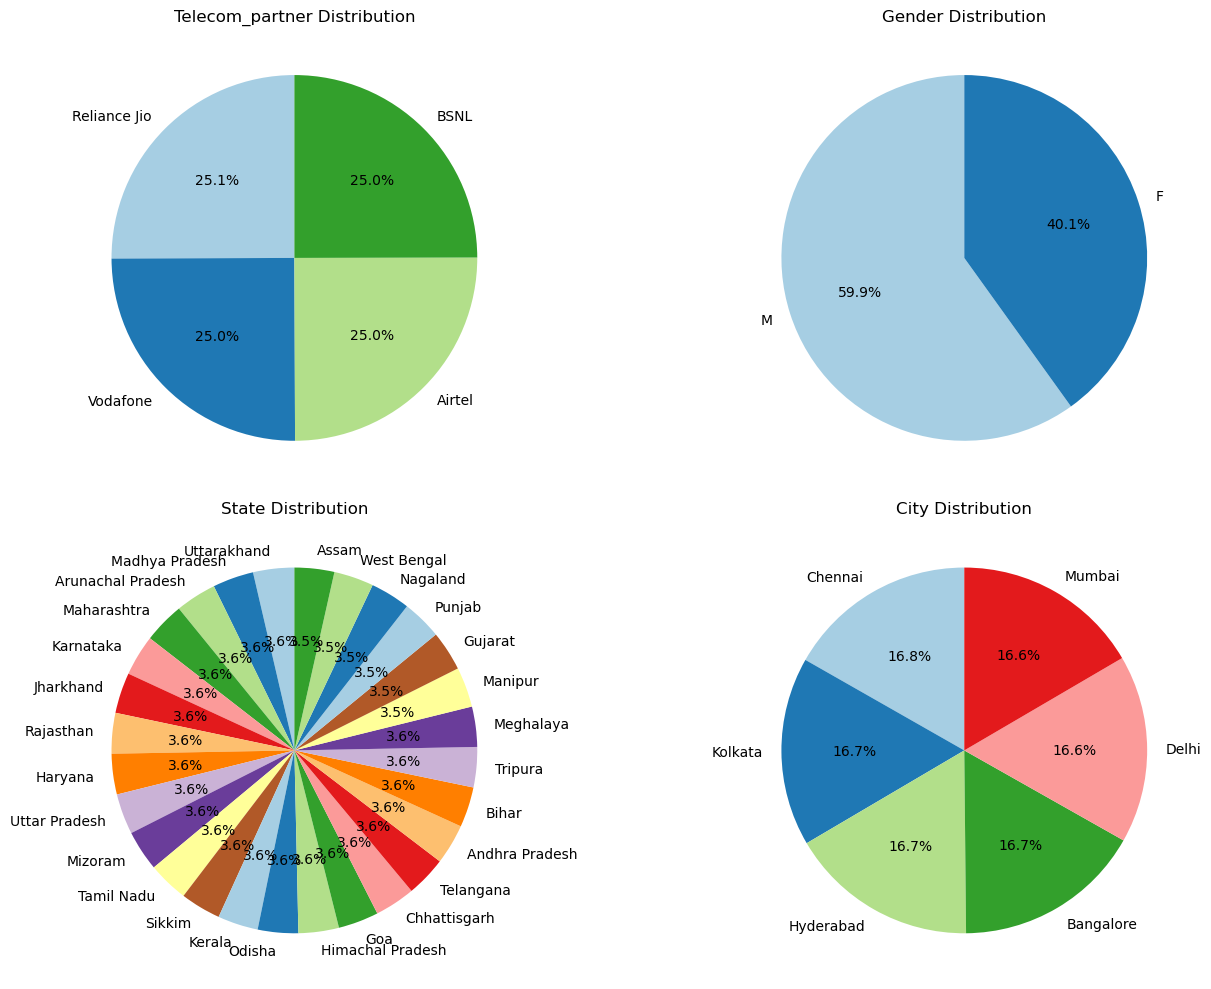

In [18]:
# Define function to create pie charts for each categorical variable
def plot_pie_charts(df, columns):
    plt.figure(figsize=(14, 10))  # Set figure size

    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)  # Create subplots (2 rows, 2 columns)
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.title(f'{column.capitalize()} Distribution')  # Set title
        plt.ylabel('')  # Remove ylabel for cleaner look

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# List of categorical variables to plot
columns = ['telecom_partner', 'gender', 'state', 'city']

# Call the function to generate pie charts
plot_pie_charts(cat_nom, columns)

> Focussing on `state` and `city` piechart, we may drop one between `city` or `state` due its unrelevance. Check the correlation will be perform to esure the appropriate selection.

We also gaining additional information from `telecom_partner` and `gender`, as below:
- partners holds equal distributions, since there is no specific pattern can be concluded, we do not need to put extra focus in partner
- gender holds 60% for male and 40% for female, which may affected the pattern in determining custumer churn or not

#### Correlation between City, Pincode, State and Churn

interval columns not set, guessing: ['pincode']


Text(0.5, 1.0, 'Phik Corr Matrix city, pincode, state, churn')

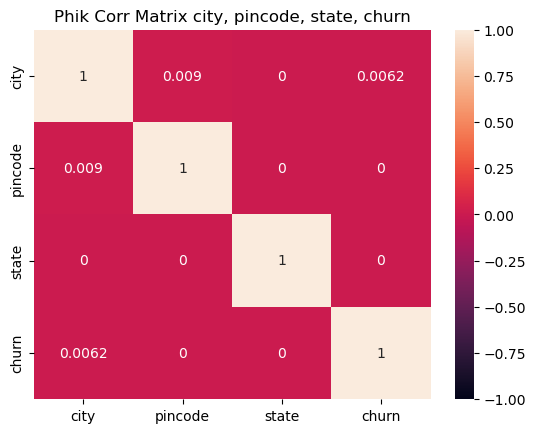

In [19]:
# Calculate Phi-k correlation matrix for state and city
phik_matrix1 = df_eda[['city', 'pincode', 'state', 'churn']].phik_matrix()

# Heatmap for Phi-k correlation matrix
sns.heatmap(phik_matrix1, annot=True, vmin=-1, vmax=1)  # Top-left
plt.title ('Phik Corr Matrix city, pincode, state, churn')

> `pincode` also included in correlation matrix, as we assumes `pincode` has high relation with location context such as city and states

From the phik matrix, we can conclude that `state` is one that unrelevant since there is no correlation with other columns, our assumption are it might be form of miss imputation in dataframe generation. To maintain the original dataset form, we are unable to drop the column, the apprropriate action are not to included it as a feature in Feature Selection.

### Label Observation

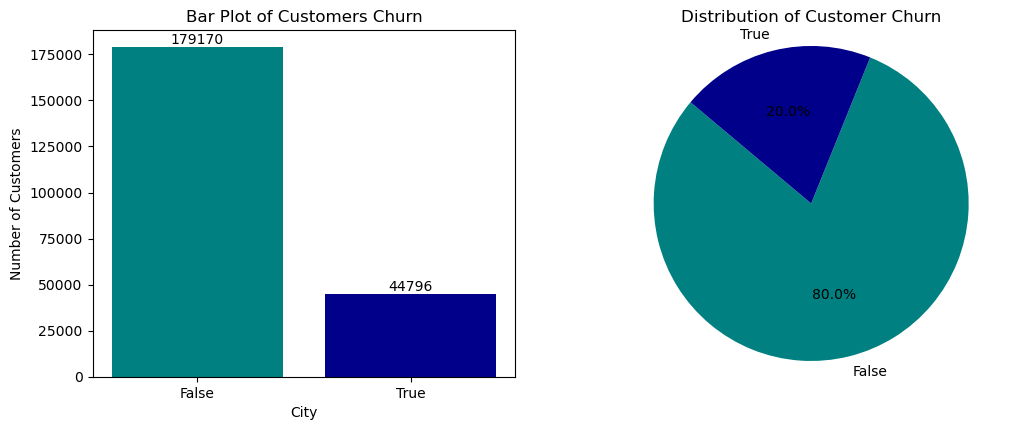

In [20]:
city_counts = df_eda['churn'].value_counts().sort_index()

# Define a color palette
colors = ["teal", "darkblue"]

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

# Bar plot
bars = axs[0].bar(city_counts.index.astype(str), city_counts.values, color=colors)
axs[0].set_title('Bar Plot of Customers Churn')
axs[0].set_xlabel('City')
axs[0].set_ylabel('Number of Customers')

# Add amounts on top of each bar with matching color
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom')

# Pie chart
axs[1].pie(city_counts, labels=city_counts.index.astype(str), autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Distribution of Customer Churn')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.show()

> Proportion of `churn` are imbalance, so we need to balance the dataset after spliting train and test set in Feature Engineering section

#### Salary and Churn

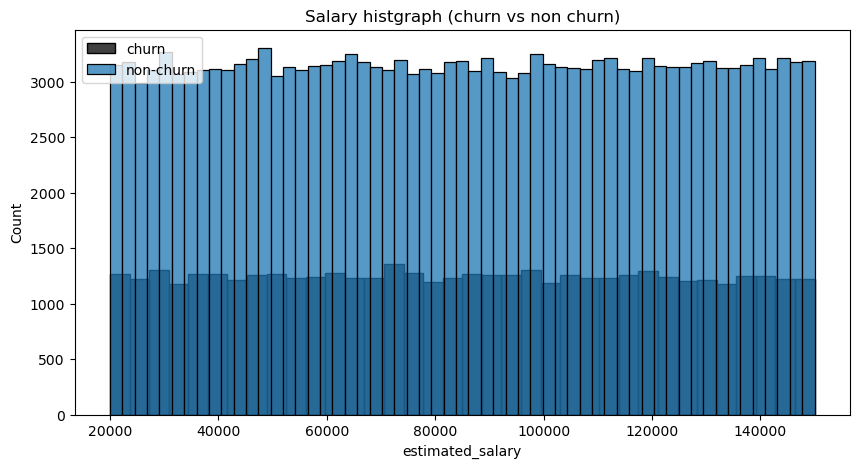

In [21]:
churn_salary = df_eda[df_eda['churn']==1]['estimated_salary']
nonchurn_salary = df_eda[df_eda['churn']==0]['estimated_salary']

plt.figure(figsize=(10,5))
sns.histplot(churn_salary,label="churn",color="black")
sns.histplot(nonchurn_salary,label="non-churn")
plt.title("Salary histgraph (churn vs non churn)")
plt.legend()
plt.show()

>customers who churn have less salary compared to whom not churn, indicating potential correlation between them

##### Gender and Churn

In [22]:
df_eda['gender'].value_counts()

gender
M    134187
F     89779
Name: count, dtype: int64

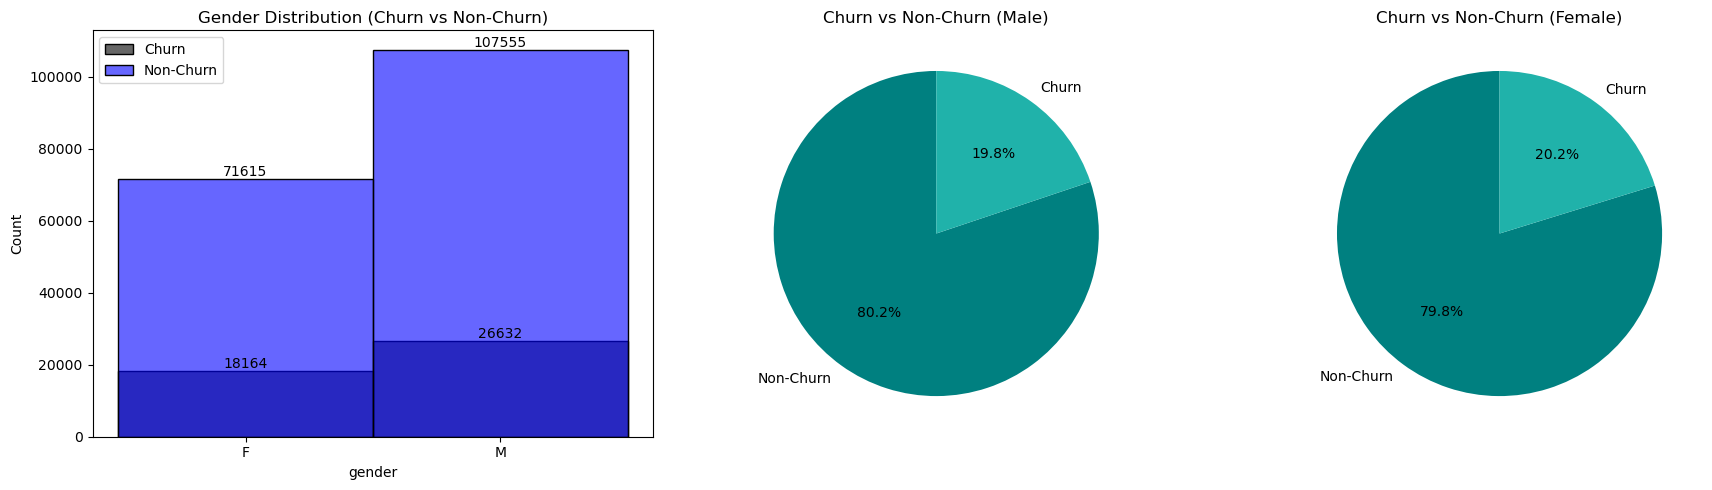

In [23]:
# Data segmentation
churn_gender = df_eda[df_eda['churn'] == 1]['gender']
nonchurn_gender = df_eda[df_eda['churn'] == 0]['gender']

# Calculate the percentage of churn for each gender
gender_churn_counts = df_eda.groupby(['gender', 'churn']).size().unstack(fill_value=0)
gender_churn_percentages = gender_churn_counts.div(gender_churn_counts.sum(axis=1), axis=0) * 100

# Create the figure canvas
plt.figure(figsize=(18, 5))

# Bar Plot (Position 1 in the canvas)
plt.subplot(1, 3, 1)  # Create 1 row and 3 columns of subplots, and position 1
sns.histplot(churn_gender, label="Churn", color="black", alpha=0.6, kde=False, stat="count", discrete=True)
sns.histplot(nonchurn_gender, label="Non-Churn", color="blue", alpha=0.6, kde=False, stat="count", discrete=True)
plt.title("Gender Distribution (Churn vs Non-Churn)")
plt.legend()
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type="edge")

# Pie Chart for Male (Position 2 in the canvas)
plt.subplot(1, 3, 2)
male_churn_values = gender_churn_percentages.loc['M']
plt.pie(male_churn_values, labels=['Non-Churn', 'Churn'], autopct='%1.1f%%', colors=['#008080', '#20B2AA'], startangle=90)
plt.title("Churn vs Non-Churn (Male)")

# Pie Chart for Female (Position 3 in the canvas)
plt.subplot(1, 3, 3)
female_churn_values = gender_churn_percentages.loc['F']
plt.pie(female_churn_values, labels=['Non-Churn', 'Churn'], autopct='%1.1f%%', colors=['#008080', '#20B2AA'], startangle=90)
plt.title("Churn vs Non-Churn (Female)")

# Display the entire canvas with all 3 plots
plt.tight_layout()
plt.show()

>the proportion of churn based on gender are equal, around 20%, but in terms of quantity the Male customer posess more size in churn customer due M gender superiority in total customer size


### Data Distribution 
>We will check the numerical columns distribution, to indicate outliers existance

In [24]:
#check numerical skewness

#create empty list
listItem= []
#loop funct
for col in num_col:
  skew_value = round(num_col[col].skew(), 1)
  
  if -0.5 <= skew_value <= 0.5:
    distribution = 'normal'
  elif (0.5 < skew_value <=1 ) or (-1 <= skew_value < -0.5):
    distribution = 'skewed'
  else:
    distribution = 'extremely skewed'

  listItem.append([col, skew_value, distribution])

#put to num_col skewness
skewness = pd.DataFrame(columns=['column name', 'skewness score', 'distribution'], data= listItem)
skewness

,column name,skewness score,distribution
0,age,-0.0,normal
1,estimated_salary,0.0,normal
2,num_dependents,0.0,normal
3,calls_made,0.0,normal
4,sms_sent,0.0,normal
5,data_used,0.0,normal


> Distribution for all numerical columns are normal, probability of outliers existance are small, but lets check by minimum and maximum boundaries

In [25]:
#create empty list
column = []
lower_bound = []
upper_bound = []
percent_outlier = []

for row in range (0, len(skewness)):
  col = skewness['column name'][row]
  #checking upper and lower boundary for skewed columns
  if skewness['distribution'][row] == 'extremely_skewed':
    IQR = num_col[col].quantile(0.75) - num_col[col].quantile(0.25)
    lower_boundary = num_col[col].quantile(0.25) - (IQR * 3)
    upper_boundary = num_col[col].quantile(0.75) + (IQR * 3)
  elif skewness['distribution'][row] == 'skewed':
    IQR = num_col[col].quantile(0.75) - num_col[col].quantile(0.25)
    lower_boundary = num_col[col].quantile(0.25) - (IQR * 1.5)
    upper_boundary = num_col[col].quantile(0.75) + (IQR * 1.5)
  #checking upper and lower boundary for normal columns
  else:
    lower_boundary = num_col[col].mean() - 3* num_col[col].std()
    upper_boundary = num_col[col].mean() + 3* num_col[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(num_col[num_col[col] > upper_boundary]) / len(num_col) * 100) + (len(num_col[num_col[col] < lower_boundary]) / len(num_col) * 100))
  percent_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_outlier,2) for percent_outlier in percent_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,age,95.40,-3.25,0.0
1,estimated_salary,197608.21,-27518.13,0.0
2,num_dependents,6.24,-2.25,0.0
3,calls_made,135.88,-34.90,0.0
4,sms_sent,67.38,-17.84,0.0
5,data_used,13682.71,-3429.07,0.0


> There is no outlier, so no handling proceess needed to performs

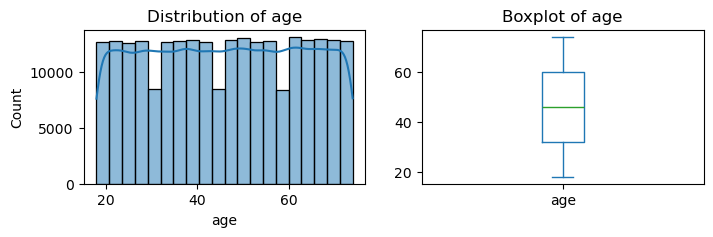

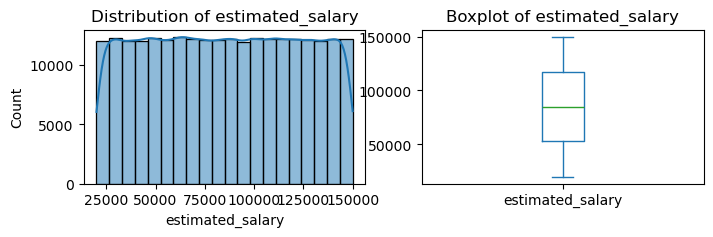

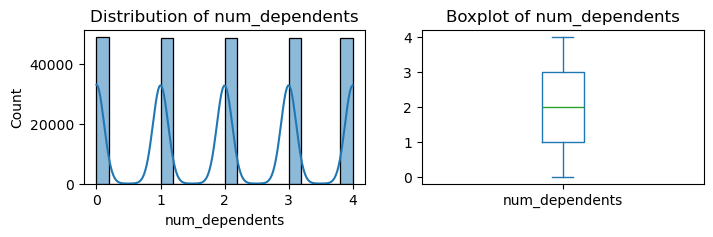

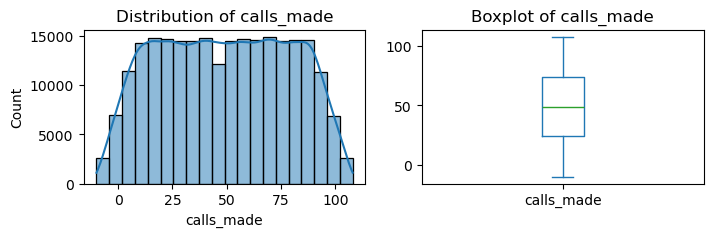

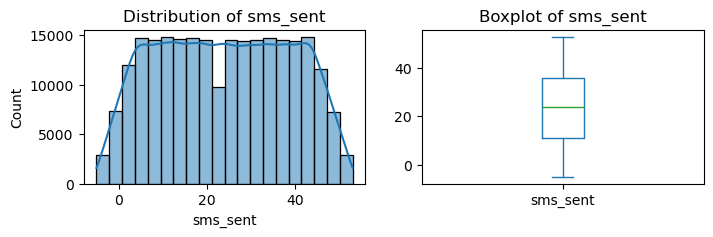

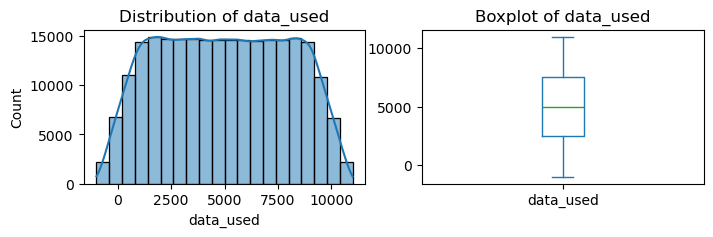

In [26]:
#plotting
for col in num_col:
   #set canvas
    plt.figure(figsize=(8,2))
    # Plot histogram for the column
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True,bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')

    # Plot boxplot for the column
    plt.subplot(1,2,2)
    df[col].plot(kind='box')
    plt.title(f"Boxplot of {col}")
        
    # Show
    plt.show()

>histogram and boxplot above used to ensure that our numerical columns are normally distributed, without any outliers

### Variable Correlation

interval columns not set, guessing: ['customer_id', 'age', 'pincode', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']


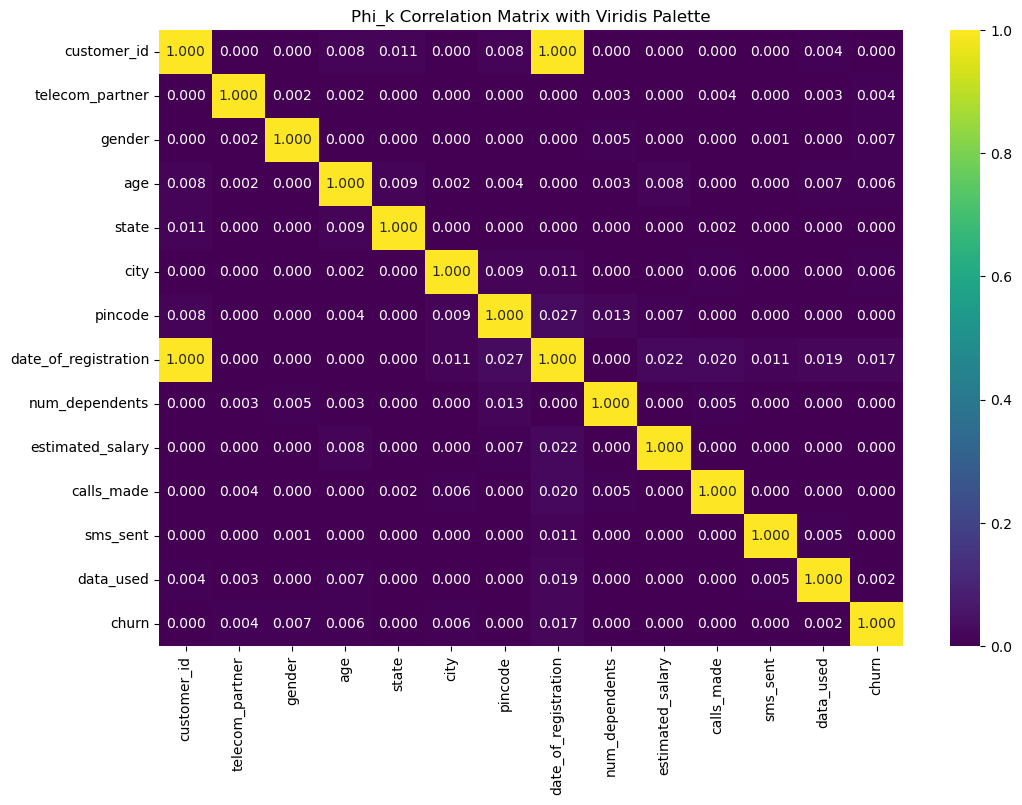

In [27]:
# Step 1: Compute the Phi_k correlation matrix
phik_corr_matrix = df_eda.phik_matrix()

# Step 2: Plot the heatmap using seaborn with Viridis color palette
plt.figure(figsize=(12, 8))
sns.heatmap(phik_corr_matrix, annot=True, cmap='viridis', fmt=".3f")
plt.title("Phi_k Correlation Matrix with Viridis Palette")
plt.show()

>almost no correlation exists between variable, we need to do check using another correlation matrix to decide the feture in feature selection

In [28]:
# Create a DataFrame to hold the correlations
correlation_pairs = []

# Iterate through the matrix to find correlations above 0.6
for i in range(len(phik_corr_matrix.columns)):
    for j in range(i):
        # Check for correlation above 0.6 (excluding -1 and 1)
        if abs(phik_corr_matrix.iloc[i, j]) > 0.01 and phik_corr_matrix.iloc[i, j] != 1:
            correlation_pairs.append((phik_corr_matrix.columns[i], phik_corr_matrix.columns[j], phik_corr_matrix.iloc[i, j]))

# Create a DataFrame to display the results
correlation_df = pd.DataFrame(correlation_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])
correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)
print('from phikk corr above, we can assume that the most significant correlation occur between:')
print(correlation_df)

from phikk corr above, we can assume that the most significant correlation occur between:
             Variable 1            Variable 2  Correlation
2  date_of_registration               pincode     0.027363
4      estimated_salary  date_of_registration     0.021652
5            calls_made  date_of_registration     0.020355
7             data_used  date_of_registration     0.019112
8                 churn  date_of_registration     0.016875
3        num_dependents               pincode     0.013079
6              sms_sent  date_of_registration     0.011428
1  date_of_registration                  city     0.011219
0                 state           customer_id     0.010757


> Observed correlation occurs for churn only exist with date_of_registartion

#### Download eda .csv

In [80]:
df_eda.to_csv('df_eda.csv', index=False)
#download prepared df for deployment

----------------------------------------------------------------------------

# 05. Feature Engineering

### Split Feature and Target

In [29]:
X = df_eda.drop(['churn'], axis=1)
y = df_eda['churn']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223966 entries, 0 to 223965
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           223966 non-null  int64         
 1   telecom_partner       223966 non-null  object        
 2   gender                223966 non-null  object        
 3   age                   223966 non-null  int64         
 4   state                 223966 non-null  object        
 5   city                  223966 non-null  object        
 6   pincode               223966 non-null  int64         
 7   date_of_registration  223966 non-null  datetime64[ns]
 8   num_dependents        223966 non-null  int64         
 9   estimated_salary      223966 non-null  int64         
 10  calls_made            223966 non-null  int64         
 11  sms_sent              223966 non-null  int64         
 12  data_used             223966 non-null  int64         
dtyp

In [30]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 223966 entries, 0 to 223965
Series name: churn
Non-Null Count   Dtype
--------------   -----
223966 non-null  bool 
dtypes: bool(1)
memory usage: 218.8 KB


### Split Train Test 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (179172, 13)
Test Size (44794, 13)


### Handling Outliers
>There is not any outliers observed in our data, so we may skip this section

### Handling Missing Values
>There is not any missing values in our data, so we may skip this section

### Cardinality Check

In [32]:
# Checking the number of unique values in categorcial columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
      print(f'Number of uniques in variable {col} are {len(X_train[col].unique())}')

Number of uniques in variable telecom_partner are 4
Number of uniques in variable gender are 2
Number of uniques in variable state are 28
Number of uniques in variable city are 6


>There is no super high cardinality in categorical columns, so we still retain the `state` columns that we found unrelevant before as the most various in value. The handling for column `state` will be placed in feature selection

*How to Handle High Cardinality?*

soon we'll do feature encoding for categirical columns, handling high cardinality features will be performed in that process. We will encode `state` using target encoder.

### Split Numerical and Categorical Columns


In [63]:
# splitt manually based on specific categories for feature transformation
num_col = ['age','estimated_salary', 'calls_made','sms_sent','data_used', 'pincode', 'num_dependents']
cat_col = ['telecom_partner','gender','city']
high_cardinality = ['state']

#split based on num cat only, to used in train and test set
all_cat = ['telecom_partner','gender','city','state']

X_train_num_col = X_train[num_col]
X_test_num_col = X_test[num_col]

X_train_cat_col = X_train[cat_col]
X_test_cat_col = X_test[cat_col]

X_train_hi_car = X_train[high_cardinality]
X_test_hi_car = X_test[high_cardinality]

X_train_all_cat = X_train[all_cat]
X_test_all_cat = X_test[all_cat]


- pincode represents a geographical location but might not directly impact customer churn in a meaningful way. Since it’s a location identifier, it can have high cardinality (many unique values). Including it could potentially add noise to your model.
- Role in Analysis: customer_id is just an identifier and carries no intrinsic meaning for predicting churn.
- date

### Feature Selection

In [34]:
#drop cust id and date
X_train = X_train.drop(columns=['date_of_registration', 'customer_id'])
X_test = X_test.drop(columns=['date_of_registration', 'customer_id'])

> - date is drop since can potentially noise our model
> - customer id also drop sice the caracteristic posess only act as identifier, and so vary in cardinality 

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179172 entries, 25853 to 92634
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   telecom_partner   179172 non-null  object
 1   gender            179172 non-null  object
 2   age               179172 non-null  int64 
 3   state             179172 non-null  object
 4   city              179172 non-null  object
 5   pincode           179172 non-null  int64 
 6   num_dependents    179172 non-null  int64 
 7   estimated_salary  179172 non-null  int64 
 8   calls_made        179172 non-null  int64 
 9   sms_sent          179172 non-null  int64 
 10  data_used         179172 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 16.4+ MB


>intital elimination of features resulted 11 potential features. we need to check based on specific formula for numerical and categorical features 

In [36]:
from scipy.stats import spearmanr

# Feature correlation examination for Continuous Numerical columns
p_values_con = []
interpretation_con = []
cols_con = []

for col in X_train_num_col.columns:
    clean_data = X_train_num_col[[col]].join(y_train).dropna()
    corr_coef, p_value = spearmanr(clean_data[col], clean_data[y_train.name])

    p_values_con.append(p_value)
    cols_con.append(col)

    # Interpret the p-value
    if p_value < 0.01:
        interpretation_con.append('Strong correlation')
    elif 0.01 <= p_value < 0.05:
        interpretation_con.append('Moderate correlation')
    else:
        interpretation_con.append('No significant correlation')

spearman_results_con = pd.DataFrame({'Column name': cols_con,
                                      'P-value': p_values_con,
                                      'Result': interpretation_con})

print(spearman_results_con)

        Column name   P-value                      Result
0               age  0.704266  No significant correlation
1  estimated_salary  0.103865  No significant correlation
2        calls_made  0.703321  No significant correlation
3          sms_sent  0.806274  No significant correlation
4         data_used  0.493515  No significant correlation
5           pincode  0.598103  No significant correlation
6    num_dependents  0.128506  No significant correlation


we consider to use Spearman's Rank Correlation since we have continuous features, with this following P-val criteria:
- p-value < 0.01: Strong evidence against the null hypothesis, indicating a statistically significant correlation.
- 0.01 ≤ p-value < 0.05: Moderate evidence against the null hypothesis, suggesting a weak to moderate correlation.
- 0.05 ≤ p-value: Weak evidence against the null hypothesis, indicating no significant correlation.

In [64]:
import scipy
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Feature correlation examination for Categorical Nominal columns
cramers_v_results = []
interpretation_results = []
for col in X_train_all_cat.columns:
    cramer_value = cramers_v(X_train_all_cat[col], y_train)
    cramers_v_results.append((col, cramer_value))

    # Interpret the Cramér's V value
    if cramer_value < 0.1:
        interpretation = 'No significant correlation'
    elif 0.1 <= cramer_value < 0.3:
        interpretation = 'Weak correlation'
    elif 0.3 <= cramer_value < 0.5:
        interpretation = 'Moderate correlation'
    else:
        interpretation = 'Strong correlation'

    interpretation_results.append(interpretation)

# Create a DataFrame to hold results and interpretations
cramers_v_df = pd.DataFrame(cramers_v_results, columns=['Column name', 'Cramérs V'])
cramers_v_df['Interpretation'] = interpretation_results

# Print the results
print(cramers_v_df)

       Column name  Cramérs V              Interpretation
0  telecom_partner   0.004087  No significant correlation
1           gender   0.004621  No significant correlation
2             city   0.005833  No significant correlation
3            state   0.012819  No significant correlation


>We will use all features, except `Date` and `Cust_ID` in terms of potintial noise in modeling process. Feature `state` that osbserved as unrelevant variable have higest carmers score, so we dicede to put it as our feature

----------------------------------------------------------------------------

# 06. Model Definition

### Pipeline for Feature Transformation

In [38]:
# Specify categorical indices for SMOTENC
# categorical_indices = [X_train.columns.get_loc(col) for col in all_cat]


# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_col', StandardScaler(),num_col),  # Numerical continuous
        ('cat_col', OneHotEncoder(), cat_col),  # Numerical discrete
        ('hi_car', TargetEncoder(), high_cardinality)  # Categorical nominal
    ],
    remainder='passthrough'  # Keep all other columns (e.g., pincode, date)
)

>while defining the pipeline preprocessor, proprly we have tried to include SMOTE-NC due our unbalance data. Unfortunetely it dosn,t work so we will do it separately after finding the best model soon.

### Model Definition and Training
>We will train 5 classifer models, KNN, Decession Tree, Random Forest, Ada Boost and SVM

#### KNN

In [39]:
# Create the full pipeline (without SMOTE for now)
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Step for preprocessing
    # ('smote_nc',SMOTENC(categorical_features=categorical_indices, random_state=42)),
    ('classifier', KNeighborsClassifier())  # Example model (e.g., LogisticRegression, RandomForest, etc.)

])

In [40]:
%%time
pipeline_knn.fit(X_train, y_train)

CPU times: user 266 ms, sys: 44.8 ms, total: 311 ms
Wall time: 317 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_col', StandardScaler(),
                                                  ['age', 'estimated_salary',
                                                   'calls_made', 'sms_sent',
                                                   'data_used', 'pincode',
                                                   'num_dependents']),
                                                 ('cat_col', OneHotEncoder(),
                                                  ['telecom_partner', 'gender',
                                                   'city']),
                                                 ('hi_car', TargetEncoder(),
                                                  ['state'])])),
                ('classifier', KNeighborsClassifier())])

In [41]:
y_pred_knn = pipeline_knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix of KNN : \n{conf}")
print(f"Classification Report of KNN : \n{clf_report}")

Accuracy Score of KNN is : 0.7644997097825602
Confusion Matrix of KNN : 
[[33696  2111]
 [ 8438   549]]
Classification Report of KNN : 
              precision    recall  f1-score   support

       False       0.80      0.94      0.86     35807
        True       0.21      0.06      0.09      8987

    accuracy                           0.76     44794
   macro avg       0.50      0.50      0.48     44794
weighted avg       0.68      0.76      0.71     44794



----------------------------------------------------------------------------

#### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', DecisionTreeClassifier())  
])

In [43]:
%%time

pipeline_dt.fit(X_train, y_train)

CPU times: user 4.36 s, sys: 114 ms, total: 4.48 s
Wall time: 4.45 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_col', StandardScaler(),
                                                  ['age', 'estimated_salary',
                                                   'calls_made', 'sms_sent',
                                                   'data_used', 'pincode',
                                                   'num_dependents']),
                                                 ('cat_col', OneHotEncoder(),
                                                  ['telecom_partner', 'gender',
                                                   'city']),
                                                 ('hi_car', TargetEncoder(),
                                                  ['state'])])),
                ('classifier', DecisionTreeClassifier())])

In [44]:
y_pred_dt = pipeline_dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
conf = confusion_matrix(y_test, y_pred_dt)
clf_report = classification_report(y_test, y_pred_dt)

print(f"Accuracy Score of Desc Tree is : {acc_dt}")
print(f"Classification Report of Desc Tree : \n{clf_report}")

Accuracy Score of Desc Tree is : 0.6631914988614547
Classification Report of Desc Tree : 
              precision    recall  f1-score   support

       False       0.80      0.77      0.79     35807
        True       0.20      0.22      0.21      8987

    accuracy                           0.66     44794
   macro avg       0.50      0.50      0.50     44794
weighted avg       0.68      0.66      0.67     44794



----------------------------------------------------------------------------

#### Random Forest

In [45]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier()) 
])

In [46]:
%%time

pipeline_rf.fit(X_train, y_train)

CPU times: user 47.3 s, sys: 867 ms, total: 48.1 s
Wall time: 49.5 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_col', StandardScaler(),
                                                  ['age', 'estimated_salary',
                                                   'calls_made', 'sms_sent',
                                                   'data_used', 'pincode',
                                                   'num_dependents']),
                                                 ('cat_col', OneHotEncoder(),
                                                  ['telecom_partner', 'gender',
                                                   'city']),
                                                 ('hi_car', TargetEncoder(),
                                                  ['state'])])),
                ('classifier', RandomForestClassifier())])

In [47]:
y_pred_rf = pipeline_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
conf = confusion_matrix(y_test, y_pred_rf)
clf_report = classification_report(y_test, y_pred_rf)

print(f"Accuracy Score of RandomForest is : {acc_rf}")
print(f"Confusion Matrix of RandomForest : \n{conf}")
print(f"Classification Report of RandomForest : \n{clf_report}")

Accuracy Score of RandomForest is : 0.7993927758181899
Confusion Matrix of RandomForest : 
[[35807     0]
 [ 8986     1]]
Classification Report of RandomForest : 
              precision    recall  f1-score   support

       False       0.80      1.00      0.89     35807
        True       1.00      0.00      0.00      8987

    accuracy                           0.80     44794
   macro avg       0.90      0.50      0.44     44794
weighted avg       0.84      0.80      0.71     44794



----------------------------------------------------------------------------

#### AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
pipeline_ab = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', AdaBoostClassifier()) 
])

In [49]:
%%time

pipeline_ab.fit(X_train, y_train)

CPU times: user 9.77 s, sys: 321 ms, total: 10.1 s
Wall time: 10.7 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_col', StandardScaler(),
                                                  ['age', 'estimated_salary',
                                                   'calls_made', 'sms_sent',
                                                   'data_used', 'pincode',
                                                   'num_dependents']),
                                                 ('cat_col', OneHotEncoder(),
                                                  ['telecom_partner', 'gender',
                                                   'city']),
                                                 ('hi_car', TargetEncoder(),
                                                  ['state'])])),
                ('classifier', AdaBoostClassifier())])

In [50]:
y_pred_ab = pipeline_ab.predict(X_test)

acc_ab = accuracy_score(y_test, y_pred_ab)
conf = confusion_matrix(y_test, y_pred_ab)
clf_report = classification_report(y_test, y_pred_ab)

print(f"Accuracy Score of AdaBoost is : {acc_ab}")
print(f"Confusion Matrix of AdaBoost : \n{conf}")
print(f"Classification Report of AdaBoost : \n{clf_report}")

Accuracy Score of AdaBoost is : 0.7993481269812921
Confusion Matrix of AdaBoost : 
[[35806     1]
 [ 8987     0]]
Classification Report of AdaBoost : 
              precision    recall  f1-score   support

       False       0.80      1.00      0.89     35807
        True       0.00      0.00      0.00      8987

    accuracy                           0.80     44794
   macro avg       0.40      0.50      0.44     44794
weighted avg       0.64      0.80      0.71     44794



#### SVM
>we skip SVM modeling since we have run for multiple times takes more than 20 minutes for each, mostly resulting error. 

# 07. Model Training
> we did model training in paralel with model definition before

----------------------------------------------------------------------------

# 08. Model Evaluation

In [54]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             ],
    'Acc Score' : [ acc_knn, acc_dt, acc_rf, acc_ab]
})

models.sort_values(by = 'Acc Score', ascending = False)

,Model,Acc Score
2,Random Forest Classifier,0.799393
3,Ada Boost Classifier,0.799348
0,KNN,0.764500
1,Decision Tree Classifier,0.663191


>based oh 4 models we have trained, the higest accuracy score are shown in Radom Forest Clasifier, so we will continue to tune its' parameter to maximize the fit and accuracy of RandomForests

### Hyperparameter Tuning for Random Forest 

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'classifier__n_estimators': [10, 200], #we have moderately sized datasets, and since our acc score is low, we need higer precision
    'classifier__max_depth': [None, 10, 50], #moderate depth, to avoid over fitting
    'classifier__min_samples_split': [1, 5], #we try small and large value
    'classifier__min_samples_leaf': [1, 5] #we try small and large value
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline_rf, 
    param_distributions=param_dist, 
    n_iter=50, 
    cv=2, scoring='accuracy', 
    verbose=2, 
    random_state=42, 
    n_jobs=-1)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=1, classifier__n_estimators=200; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=1, classifier__n_estimators=200; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=1, classifier__n_estimators=10; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=1, classifier__n_estimators=10; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=5, classifier__min_samples_split=1, classifier__n_estimators=10; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=5, classifier__min_samples_split=1, classifier__n_estimators=10; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=5, classifier__min_samples_split

In [67]:
# Output the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
Best Score:  0.800141763221932


In [69]:
rf_gridcv_best = random_search.best_estimator_

### Train the Model Using Best Estimator

In [70]:
y_pred_train_tuned = rf_gridcv_best.predict(X_train)
y_pred_test_tuned= rf_gridcv_best.predict(X_test)

print(y_pred_train_tuned)

[False False False ...  True  True False]


In [71]:
def evaluate_roc_auc(roc_auc):
    if roc_auc > 0.9:
        return 'Good'
    elif 0.8 <= roc_auc <= 0.9:
        return 'Fair'
    elif 0.7 <= roc_auc < 0.8:
        return 'Decent'
    elif 0.6 <= roc_auc < 0.7:
        return 'Not Great'
    else:
        return 'Poor'

In [72]:
# Evaluation
from sklearn.metrics import roc_auc_score, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Binarize the predictions
y_pred_proba_tune = np.where(y_pred_test_tuned >= 0.5, 1, 0)  

# Calculate roc_auc_score
roc_auc_tune = roc_auc_score(y_test, y_pred_proba_tune)

# Print evaluation
print(f"ROC AUC Score: {roc_auc_tune:.2f}")
print(f"Evaluation: {evaluate_roc_auc(roc_auc_tune)}")

ROC AUC Score: 0.50
Evaluation: Poor


>poor ROC AUC score indicates that the model perform not better than random guessing (randomsearch) which means poor classification ability. We also can analize the limitations of the model prediction based on confussion matrix below, either for train or test set.

We already guessing some issues that might cause poor model:
1. Insufficient or non-representative data, (i.e. extremely low correlation for all features to target) this lead poor feature selection that fails to capture meaningful distinctions between classes. 
2. Class imbalance where one class significantly outweighs the other, we know that the proprtion among clasess are 1:4, but we do not perform balancing due our resources limitation, this could be future improvement.
3. Inappropriate model choice that doesn’t fit the data’s complexities also may causing this issue, since we skip SVM training due resurces limitation.

F1 Score - Test Set   :  0.99363451134687 

Classification Report : 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    143363
        True       1.00      0.99      0.99     35809

    accuracy                           1.00    179172
   macro avg       1.00      0.99      1.00    179172
weighted avg       1.00      1.00      1.00    179172
 

Confusion Matrix      : 


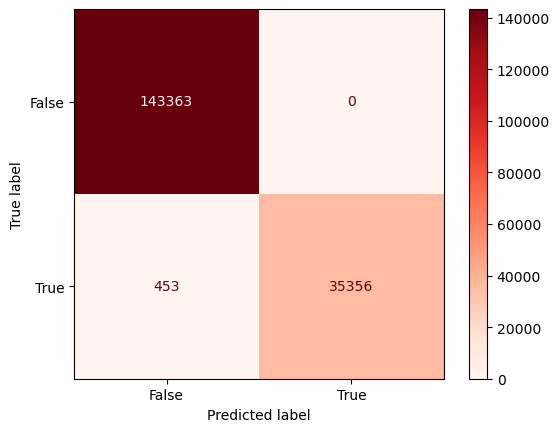

In [73]:
# Check Performance Model against Test-Set
print('F1 Score - Train Set   : ', f1_score(y_train, y_pred_train_tuned), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_search, X_train, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.0 

Classification Report : 
               precision    recall  f1-score   support

       False       0.80      1.00      0.89     35807
        True       0.00      0.00      0.00      8987

    accuracy                           0.80     44794
   macro avg       0.40      0.50      0.44     44794
weighted avg       0.64      0.80      0.71     44794
 

Confusion Matrix      : 


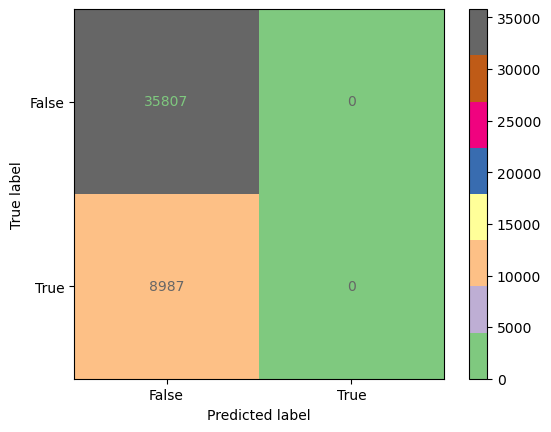

In [76]:
# Check Performance Model against Test-Set
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_tuned), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_search, X_test, y_test, cmap='Accent'))

>model failed to identify any true class

The performance on the test set, indicated by an F1 score of 0.0, contrasts sharply with the training set results, highlighting overfitting and the model's inability to generalize. 

In [77]:
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train_tuned, y_test, y_pred_test_tuned, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train_tuned),
      'train - recall' : recall_score(y_train, y_pred_train_tuned),
      'train - accuracy' : accuracy_score(y_train, y_pred_train_tuned),
      'train - f1_score' : f1_score(y_train, y_pred_train_tuned),
      'test - precision' : precision_score(y_test, y_pred_test_tuned),
      'test - recall' : recall_score(y_test, y_pred_test_tuned),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test_tuned),
      'test - f1_score' : f1_score(y_test, y_pred_test_tuned),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train_tuned, y_test, y_pred_test_tuned, 'Random Search')
pd.DataFrame(all_reports)

,Random Search
train - precision,1.000000
train - recall,0.987350
train - accuracy,0.997472
train - f1_score,0.993635
test - precision,0.000000
test - recall,0.000000
test - accuracy_score,0.799370
test - f1_score,0.000000


The significant contrast between training and test performance suggests that the model has overfitted to the training data, resulting in no correct predictions for the True class.

----------------------------------------------------------------------------

# ix. Model Saving

In [79]:
import pickle 

with open('model.pkl', 'wb') as file_1:
  pickle.dump(pipeline_rf, file_1)

----------------------------------------------------------------------------

# x. Model Inference
>this section are written sparetaly from this notebook, we can go to notebook titled `'P1M2_ediashta_narendra_inf.ibynb'`

----------------------------------------------------------------------------

# xi. Conclusion

----------------------------------------------------------------------------